<a href="https://colab.research.google.com/github/M-Harshu/AI-Based-Payload-Fairing-Optimization/blob/main/AIML_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

n = 1500

outer_diameter_m = np.random.uniform(3.0, 5.0, n)
fairing_length_m = np.random.uniform(8.0, 15.0, n)
wall_thickness_mm = np.random.uniform(5, 15, n)
cone_angle_deg = np.random.uniform(5, 25, n)
top_diameter_m = np.random.uniform(0.5, 1.5, n)
panel_type = np.random.choice(['composite', 'honeycomb'], n, p=[0.7, 0.3])
core_density_kg_m3 = np.where(panel_type == 'honeycomb', 50, 160)
face_density_kg_m3 = np.where(panel_type == 'honeycomb', 1800, 1600)
core_thickness_mm = np.random.uniform(5, 20, n)
axial_load_kN = np.random.uniform(100, 300, n)
pressure_load_kPa = np.random.uniform(10, 50, n)
acoustic_load_dB = np.random.uniform(130, 160, n)
vibration_g = np.random.uniform(3, 8, n)
thermal_load_C = np.random.uniform(-80, 120, n)
material_cost_per_kg = np.random.uniform(50, 200, n)
fabrication_complexity = np.random.randint(1, 6, n)

volume_m3 = np.pi * (outer_diameter_m / 2)**2 * fairing_length_m * (wall_thickness_mm / 1000)
gross_mass_kg = volume_m3 * face_density_kg_m3
buckling_load_kN = axial_load_kN * np.random.uniform(1.2, 2.0, n)
safety_factor = buckling_load_kN / axial_load_kN
weight_opt_factor_percent = np.random.uniform(10, 40, n)

data = pd.DataFrame({
    'outer_diameter_m': outer_diameter_m,
    'fairing_length_m': fairing_length_m,
    'wall_thickness_mm': wall_thickness_mm,
    'cone_angle_deg': cone_angle_deg,
    'top_diameter_m': top_diameter_m,
    'panel_type': panel_type,
    'core_density_kg_m3': core_density_kg_m3,
    'face_density_kg_m3': face_density_kg_m3,
    'core_thickness_mm': core_thickness_mm,
    'axial_load_kN': axial_load_kN,
    'pressure_load_kPa': pressure_load_kPa,
    'acoustic_load_dB': acoustic_load_dB,
    'vibration_g': vibration_g,
    'thermal_load_C': thermal_load_C,
    'material_cost_per_kg': material_cost_per_kg,
    'fabrication_complexity': fabrication_complexity,
    'gross_mass_kg': gross_mass_kg,
    'buckling_load_kN': buckling_load_kN,
    'safety_factor': safety_factor,
    'weight_opt_factor_percent': weight_opt_factor_percent
})

data.to_csv("payload_fairing_dataset.csv", index=False)

print(" Dataset saved as payload_fairing_dataset.csv")


 Dataset saved as payload_fairing_dataset.csv


In [2]:
import pandas as pd
df = pd.read_csv("payload_fairing_dataset.csv")

In [3]:
print(df.head())

   outer_diameter_m  fairing_length_m  wall_thickness_mm  cone_angle_deg  \
0          4.225642         14.053358           5.611950        5.896616   
1          3.299228         13.288900          11.644644       24.821737   
2          3.085415         12.058196           7.857508       10.019257   
3          4.637316         10.997296           6.151984       13.555412   
4          3.110029         13.454899           6.769557        9.977927   

   top_diameter_m panel_type  core_density_kg_m3  face_density_kg_m3  \
0        1.451358  honeycomb                  50                1800   
1        0.718887  composite                 160                1600   
2        0.631105  honeycomb                  50                1800   
3        0.644295  honeycomb                  50                1800   
4        0.535476  composite                 160                1600   

   core_thickness_mm  axial_load_kN  pressure_load_kPa  acoustic_load_dB  \
0          17.099571     247.33718

In [4]:
print(df.describe())

       outer_diameter_m  fairing_length_m  wall_thickness_mm  cone_angle_deg  \
count       1500.000000       1500.000000        1500.000000     1500.000000   
mean           3.987172         11.468743          10.040233       14.791773   
std            0.576006          2.016113           2.957819        5.714462   
min            3.001948          8.001713           5.013569        5.001550   
25%            3.492820          9.750261           7.468419        9.943813   
50%            3.957452         11.415224          10.094693       14.503483   
75%            4.501712         13.205161          12.648782       19.796341   
max            4.999760         14.999744          14.983524       24.980459   

       top_diameter_m  core_density_kg_m3  face_density_kg_m3  \
count     1500.000000         1500.000000         1500.000000   
mean         0.996639          128.173333         1657.866667   
std          0.288183           49.896457           90.720830   
min          0.5000

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   outer_diameter_m           1500 non-null   float64
 1   fairing_length_m           1500 non-null   float64
 2   wall_thickness_mm          1500 non-null   float64
 3   cone_angle_deg             1500 non-null   float64
 4   top_diameter_m             1500 non-null   float64
 5   panel_type                 1500 non-null   object 
 6   core_density_kg_m3         1500 non-null   int64  
 7   face_density_kg_m3         1500 non-null   int64  
 8   core_thickness_mm          1500 non-null   float64
 9   axial_load_kN              1500 non-null   float64
 10  pressure_load_kPa          1500 non-null   float64
 11  acoustic_load_dB           1500 non-null   float64
 12  vibration_g                1500 non-null   float64
 13  thermal_load_C             1500 non-null   float

In [6]:
pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.0/136.0 kB 6.7 MB/s eta 0:00:00


In [7]:
import random
import numpy as np
import pandas as pd
from deap import base, creator, tools, algorithms

In [8]:
df = pd.read_csv("payload_fairing_dataset.csv")

In [9]:
import random
import numpy as np
from deap import base, creator, tools, algorithms

creator.create("FitnessMulti", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()

toolbox.register("attr_index", random.randint, 0, len(data) - 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_index, 1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


In [10]:
def evaluate(individual):
    index = individual[0]
    row = data.iloc[index]

    mass = row['gross_mass_kg']
    cost = row['material_cost_per_kg'] * mass
    fitness_values = (mass, cost)
    return fitness_values

In [11]:
def evaluate(individual):
    index = individual[0]
    row = data.iloc[index]
    mass = row['gross_mass_kg']
    cost = row['material_cost_per_kg'] * mass
    return (mass, cost)

toolbox.register("evaluate", evaluate)

toolbox.register("select", tools.selNSGA2)

def mutate_individual(individual, upper_bound):
    new_index = random.randint(0, upper_bound - 1)
    individual[0] = new_index
    return individual,

toolbox.register("mutate", mutate_individual, upper_bound=len(data))

toolbox.register("mate", tools.cxOnePoint)

POP_SIZE = 100
population = toolbox.population(n=POP_SIZE)

for ind in population:
    ind.fitness.values = toolbox.evaluate(ind)

NGEN = 50
MU = POP_SIZE
LAMBDA = POP_SIZE
CXPB = 0.0
MUTPB = 1.0

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean, axis=0)
stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)

logbook = tools.Logbook()
logbook.header = "gen", "evals", "std", "min", "avg", "max"

population, logbook = algorithms.eaMuPlusLambda(
    population, toolbox, mu=MU, lambda_=LAMBDA,
    cxpb=CXPB, mutpb=MUTPB, ngen=NGEN,
    stats=stats, halloffame=None, verbose=True
)

print("✅ Evolution complete.")

gen	nevals	avg                              	std                              	min                            	max                              
0  	0     	[  2395.75255614 281958.39829859]	[  1192.55816983 183538.88787971]	[  678.93448288 41634.08979271]	[  6295.86265574 930709.50035169]
1  	100   	[  1594.99989069 167322.62858866]	[  492.84340566 71792.42584538]  	[  656.01971969 41634.08979271]	[  2775.63116066 363607.24337489]
2  	100   	[  1419.93026189 139388.25777194]	[  421.06546996 50243.56381829]  	[  656.01971969 41634.08979271]	[  2769.79909764 282405.92957299]
3  	100   	[  1258.7943381  130285.38315827]	[  348.35436891 49305.28706417]  	[  606.47650774 41634.08979271]	[  2284.20163353 255131.33678367]
4  	100   	[  1185.16422287 124278.15160263]	[  300.76817533 46747.84817146]  	[  606.47650774 41634.08979271]	[  1907.72453343 243671.44053285]
5  	100   	[  1140.22472047 119859.15887912]	[  291.1634611 46834.1859869]    	[  606.47650774 41634.08979271]	[  1907.72453343 21

In [12]:
best_ind = tools.selBest(population, k=1)[0]
best_index = best_ind[0]

best_row = df.iloc[best_index]

print(best_row.T)

outer_diameter_m               3.072695
fairing_length_m               9.975454
wall_thickness_mm              5.124275
cone_angle_deg                14.331316
top_diameter_m                  1.04325
panel_type                    composite
core_density_kg_m3                  160
face_density_kg_m3                 1600
core_thickness_mm              6.133862
axial_load_kN                274.274541
pressure_load_kPa             44.438496
acoustic_load_dB             130.950205
vibration_g                    7.368949
thermal_load_C               -54.579494
material_cost_per_kg         115.795881
fabrication_complexity                4
gross_mass_kg                606.476508
buckling_load_kN             508.469197
safety_factor                  1.853869
weight_opt_factor_percent     28.010747
Name: 113, dtype: object


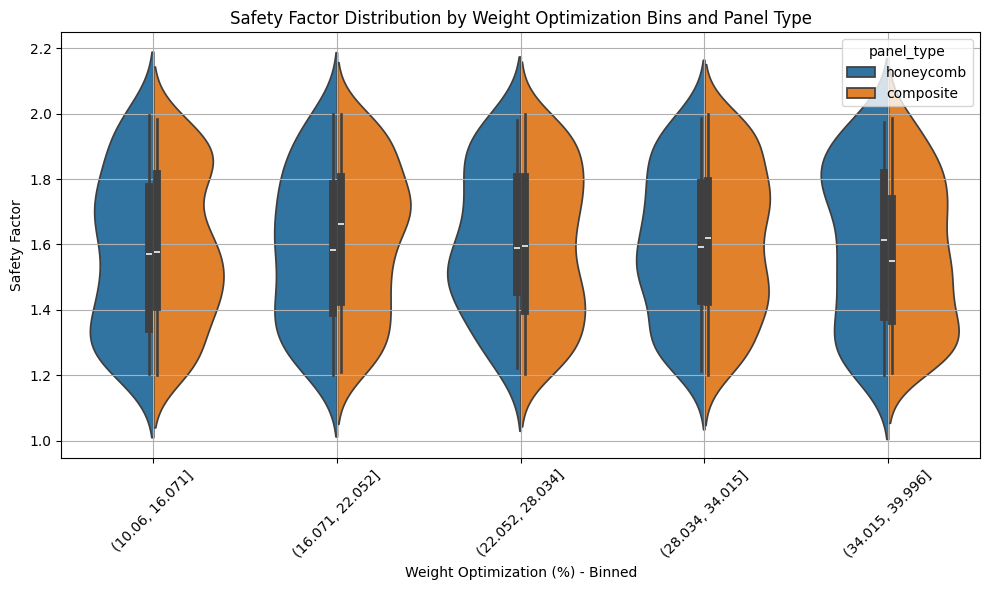

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

df['weight_opt_bins'] = pd.cut(df['weight_opt_factor_percent'], bins=5)

plt.figure(figsize=(10, 6))
sns.violinplot(x='weight_opt_bins', y='safety_factor', hue='panel_type', data=df, split=True)
plt.title("Safety Factor Distribution by Weight Optimization Bins and Panel Type")
plt.xlabel("Weight Optimization (%) - Binned")
plt.ylabel("Safety Factor")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

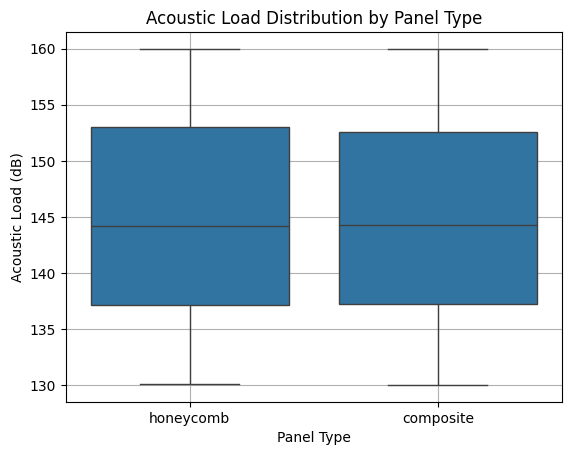

In [14]:
sns.boxplot(x='panel_type', y='acoustic_load_dB', data=df)
plt.title("Acoustic Load Distribution by Panel Type")
plt.xlabel("Panel Type")
plt.ylabel("Acoustic Load (dB)")
plt.grid(True)
plt.show()


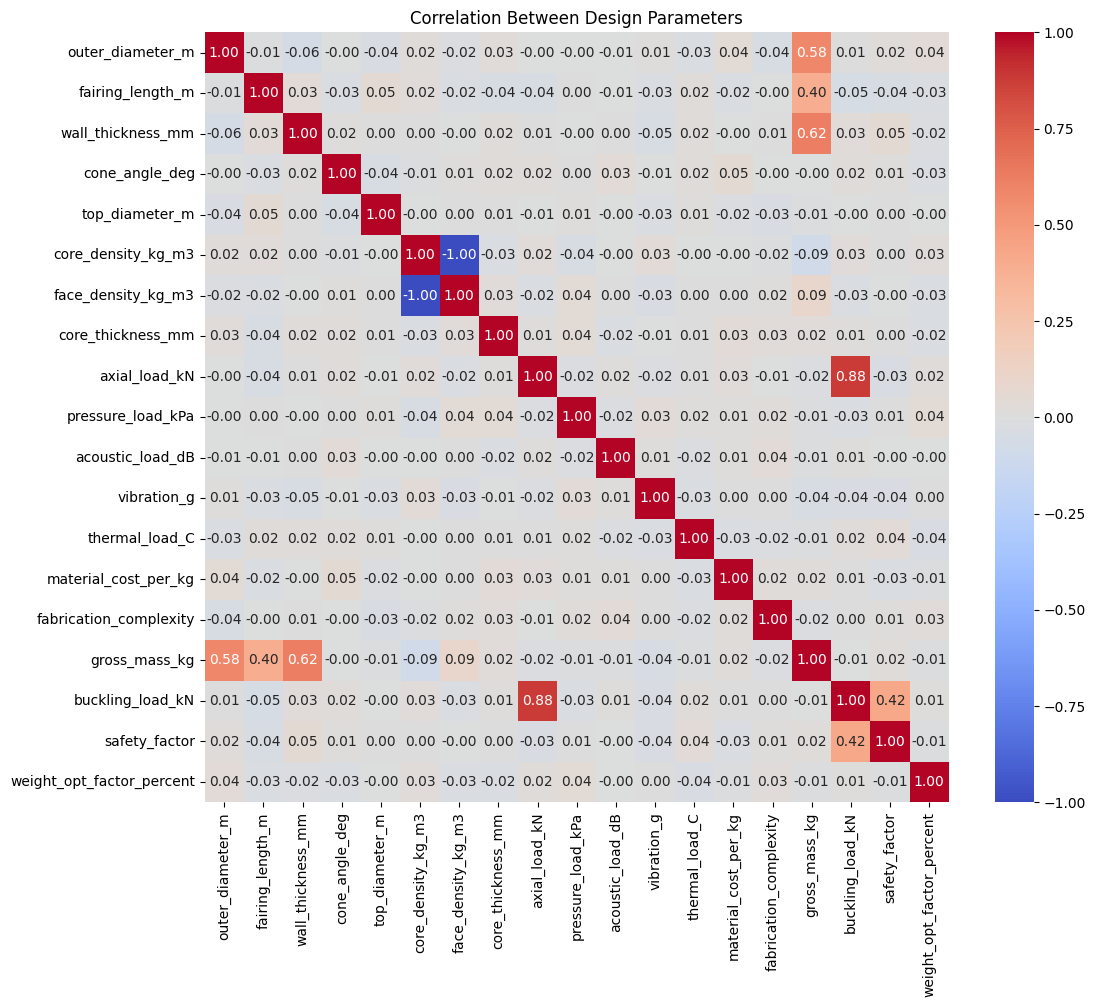

In [15]:
plt.figure(figsize=(12,10))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Design Parameters")
plt.show()

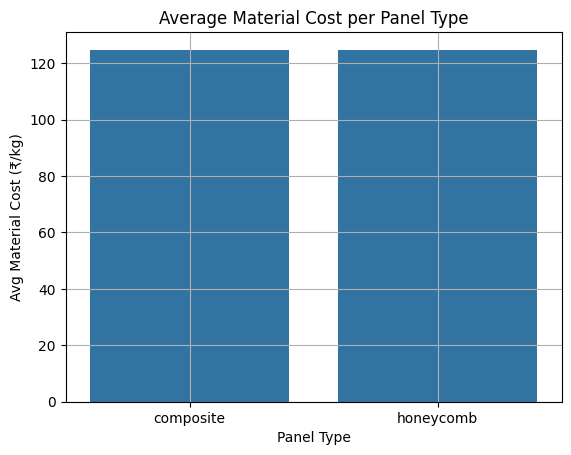

In [16]:
avg_cost = df.groupby('panel_type')['material_cost_per_kg'].mean().reset_index()

sns.barplot(x='panel_type', y='material_cost_per_kg', data=avg_cost)
plt.title("Average Material Cost per Panel Type")
plt.xlabel("Panel Type")
plt.ylabel("Avg Material Cost (₹/kg)")
plt.grid(True)
plt.show()


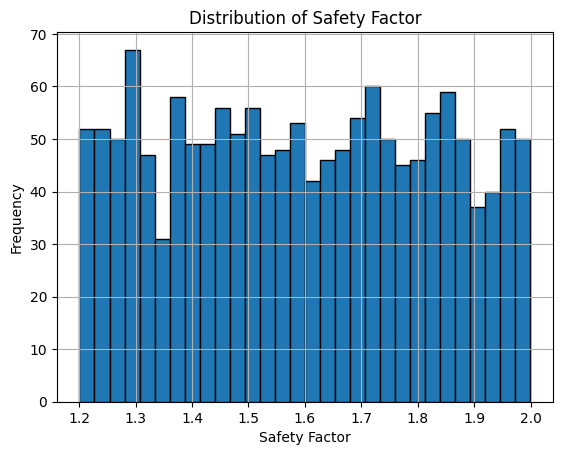

In [17]:
df['safety_factor'].plot(kind='hist', bins=30, edgecolor='black')
plt.title("Distribution of Safety Factor")
plt.xlabel("Safety Factor")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


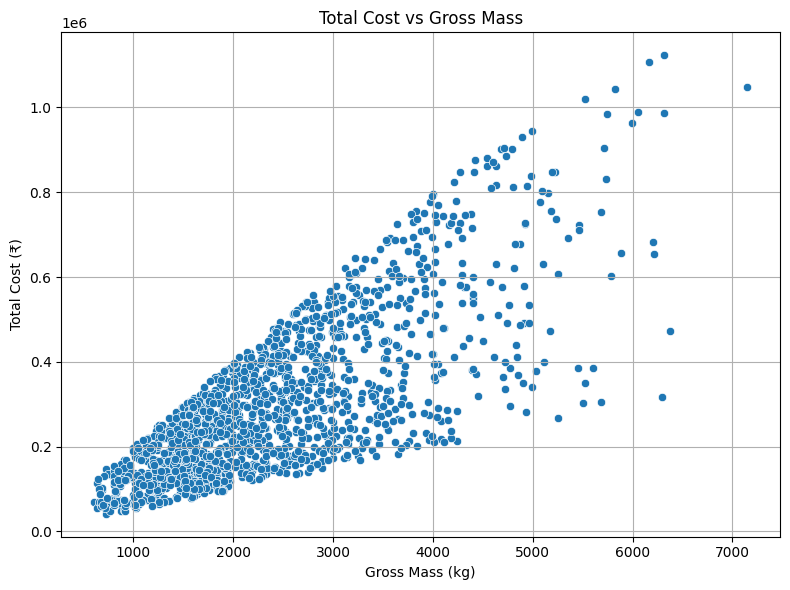

In [18]:
df['total_cost'] = df['gross_mass_kg'] * df['material_cost_per_kg']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='gross_mass_kg', y='total_cost', data=df)
plt.title("Total Cost vs Gross Mass")
plt.xlabel("Gross Mass (kg)")
plt.ylabel("Total Cost (₹)")
plt.grid(True)
plt.tight_layout()
plt.show()

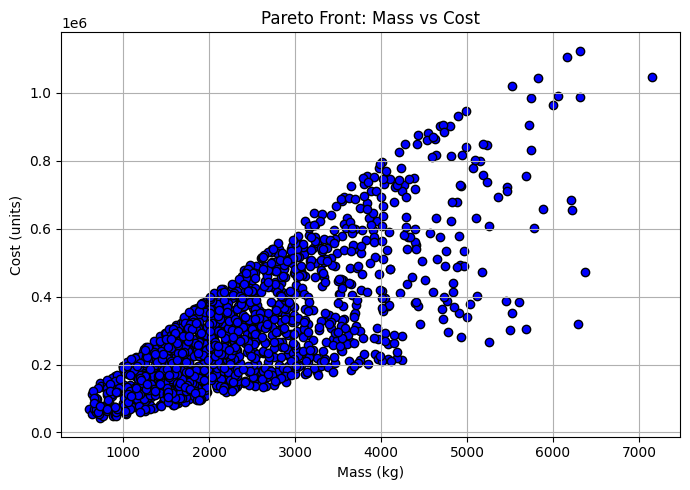

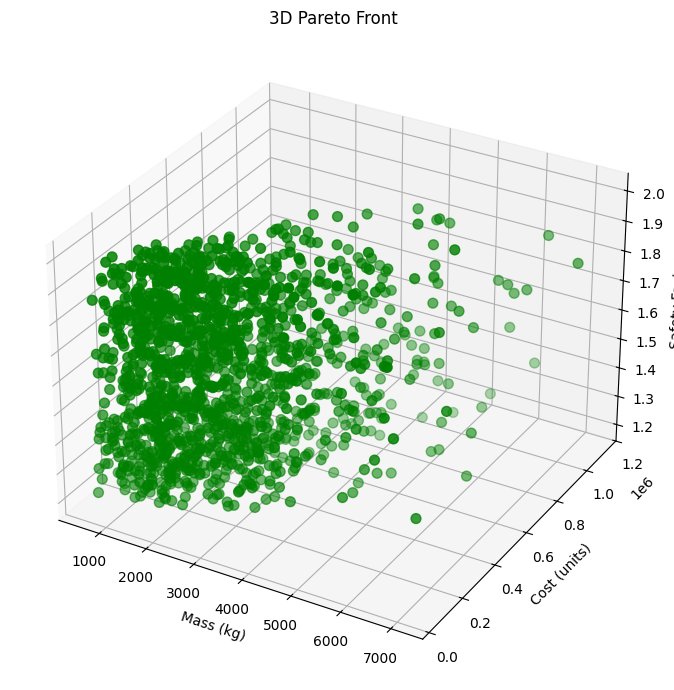

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Calculate Mass, Cost, and Safety
mass = df['gross_mass_kg']
cost = df['material_cost_per_kg'] * mass
safety = df['safety_factor']

# Plot 2D Pareto Front: Mass vs Cost
plt.figure(figsize=(7, 5))
plt.scatter(mass, cost, color='blue', edgecolors='black')
plt.title("Pareto Front: Mass vs Cost")
plt.xlabel("Mass (kg)")
plt.ylabel("Cost (units)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 3D Pareto Front: Mass vs Cost vs Safety
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mass, cost, safety, c='green', s=50)
ax.set_title("3D Pareto Front")
ax.set_xlabel("Mass (kg)")
ax.set_ylabel("Cost (units)")
ax.set_zlabel("Safety Factor")
plt.tight_layout()
plt.show()

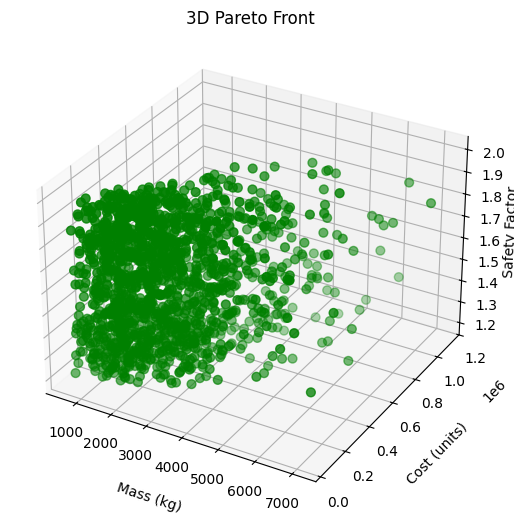

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract relevant columns
mass = df["gross_mass_kg"]
cost = df["material_cost_per_kg"] * mass
safety = df["safety_factor"]

# Create 3D plot with custom figure size
fig = plt.figure(figsize=(7, 6))  # Slightly taller for Z label visibility
ax = fig.add_subplot(111, projection='3d')

# Plotting
sc = ax.scatter(mass, cost, safety, c='green', s=40)

# Axis labels
ax.set_title("3D Pareto Front")
ax.set_xlabel("Mass (kg)", labelpad=10)
ax.set_ylabel("Cost (units)", labelpad=10)
ax.set_zlabel("Safety Factor", labelpad=0)  # Increase labelpad for visibility

# Adjust layout manually to fix label clipping
fig.subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.9)

# Show the plot
plt.show()

In [21]:
params = {
    "outer_diameter_mm": 3.135429 * 1000,
    "fairing_length_mm": 8.913036 * 1000,
    "wall_thickness_mm": 5.028898,
    "cone_angle_deg": 10.738076,
    "top_diameter_mm": 1.342155 * 1000,
    "core_thickness_mm": 16.642805,
    "core_density_kg_m3": 160,
    "face_density_kg_m3": 1600,
    "axial_load_kN": 293.868924,
    "pressure_load_kPa": 22.985933,
    "acoustic_load_dB": 148.426738,
    "vibration_g": 3.427502,
    "thermal_load_C": 8.099819,
    "material_cost_per_kg": 157.530053,
    "fabrication_complexity": 5,
    "gross_mass_kg": 553.735441,
    "buckling_load_kN": 425.04836,
    "safety_factor": 1.446388,
    "weight_opt_factor_percent": 21.126566
}


In [22]:
import pandas as pd

df = pd.DataFrame(params.items(), columns=["parameter", "value"])
df.to_csv("rocket_params.csv", index=False)


In [23]:
from google.colab import files
files.download("rocket_params.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>